# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

75


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=metric"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        #cities.remove(name)
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")

Beginning Data Retrieval
------------------------------
Processing record 0 | Jining
Data visual: 1

Processing record 1 | Sur
Data visual: 2

Processing record 2 | Puro
Data visual: 3

Processing record 3 | Khatanga
Data visual: 4

Processing record 4 | Barrow
Data visual: 5

Processing record 5 | Kashi
Data visual: 6

Processing record 6 | Jamestown
Data visual: 7

No data found for Umzimvubu. Skipping...
Data visual: 8

Processing record 8 | Rikitea
Data visual: 9

Processing record 9 | Souillac
Data visual: 10

Processing record 10 | Bredasdorp
Data visual: 11

Processing record 11 | Atuona
Data visual: 12

Processing record 12 | Buchanan
Data visual: 13

Processing record 13 | Ribeira grande
Data visual: 14

Processing record 14 | Georgetown
Data visual: 15

Processing record 15 | Posse
Data visual: 16

No data found for Wahran. Skipping...
Data visual: 17

Processing record 17 | Shimanovsk
Data visual: 18

Processing record 18 | Kavieng
Data visual: 19

Processing record 19 | Por

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jining,35.41,116.58,11.58,87,92,0.53,CN,1602690818
1,sur,22.57,59.53,26.64,41,0,4.99,OM,1602690819
2,puro,12.48,123.38,25.3,88,100,2.38,PH,1602690819
3,khatanga,71.97,102.5,-5.08,98,100,4.31,RU,1602690819
4,barrow,71.29,-156.79,-3,73,90,7.2,US,1602690820
...,...,...,...,...,...,...,...,...,...
70,asau,46.43,26.4,10.56,78,6,1.33,RO,1602690837
71,qorveh,35.17,47.8,10.11,36,0,2.27,IR,1602690837
72,leningradskiy,69.38,178.42,-1.73,92,95,3.59,RU,1602690837
73,zinder,13.81,8.99,37,25,20,3.1,NE,1602690837


In [67]:
over_100 = city_data.loc[city_data["Humidity"] < 50]

over_100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,sur,22.57,59.53,26.64,41,0,4.99,OM,1602690819
5,kashi,39.45,75.98,12,32,20,3,CN,1602690820
15,posse,-14.09,-46.37,32.54,31,88,2.03,BR,1602690822
21,tocopilla,-22.09,-70.2,20.18,46,13,4.79,CL,1602690824
22,karratha,-20.74,116.85,29.4,28,0,6.52,AU,1602690824
61,cape town,-33.93,18.42,23.33,49,33,4.6,ZA,1602690752
63,fort morgan,40.25,-103.8,20,14,40,6.7,US,1602690544
71,qorveh,35.17,47.8,10.11,36,0,2.27,IR,1602690837
73,zinder,13.81,8.99,37,25,20,3.1,NE,1602690837


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] < 50].index
humid_index

Int64Index([1, 5, 15, 21, 22, 61, 63, 71, 73], dtype='int64')

In [69]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jining,35.41,116.58,11.58,87,92,0.53,CN,1602690818
2,puro,12.48,123.38,25.3,88,100,2.38,PH,1602690819
3,khatanga,71.97,102.5,-5.08,98,100,4.31,RU,1602690819
4,barrow,71.29,-156.79,-3,73,90,7.2,US,1602690820
6,jamestown,42.1,-79.24,15.56,58,1,4.1,US,1602690673
...,...,...,...,...,...,...,...,...,...
68,vaini,-21.2,-175.2,22,78,40,3.6,TO,1602690836
69,mount gambier,-37.83,140.77,19,68,87,4.6,AU,1602690836
70,asau,46.43,26.4,10.56,78,6,1.33,RO,1602690837
72,leningradskiy,69.38,178.42,-1.73,92,95,3.59,RU,1602690837


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

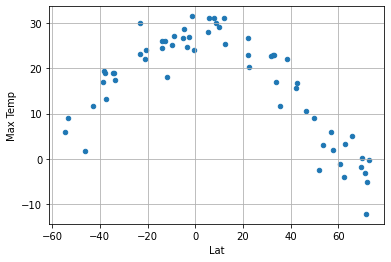

In [70]:
lat_vs_temp = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True)
plt.xlabel = "Latitude"
# plt.ylabel = "Max Temperature (F)"
# plt.title = "Latitude vs Max Temp (F)"
# plt.savefig("../output_data/Latitude vs Max Temp.png")
# plt.show()

## Latitude vs. Humidity Plot

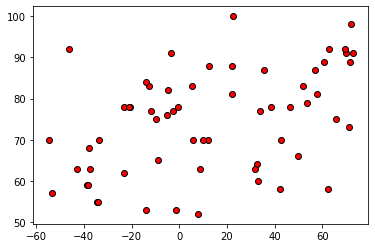

In [71]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker = "o", facecolors = "red", edgecolors = "black")
# plt.ylim(-60, 80)
# plt.ylim(-10, 35)
plt.title = "Latitude vs Humidity"
# plt.xlabel = "Latitude"
# plt.ylabel ="Humidity"
plt.savefig = "../output_data/Latitude vs Humidity.png"
plt.show()

## Latitude vs. Cloudiness Plot

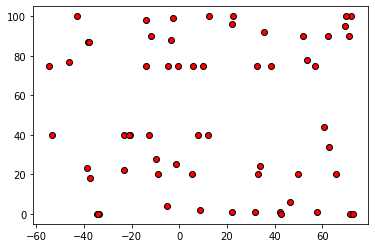

In [72]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Cloudiness"
plt.savefig = "../output_data/Latitude vs Cloudiness.png"
plt.show() 

## Latitude vs. Wind Speed Plot

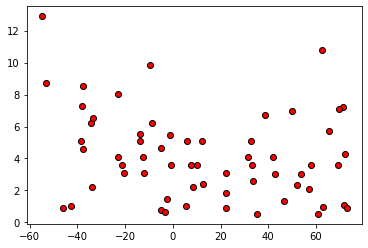

In [73]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker = "o", facecolors = "red", edgecolors = "black")
plt.savefig = "../output_data/Latitude vs Wind Speed.png"
plt.show()

## Linear Regression

In [77]:
north_city_data["Lat"]

8    -23.12
9    -20.52
10   -34.53
11     -9.8
18    -2.57
19   -33.59
20    -4.88
28   -12.04
30   -37.62
33    -0.74
34   -13.97
36   -46.19
39   -38.65
41    -54.8
42   -12.73
43   -53.15
44   -22.97
45     -1.2
47    -4.97
49   -42.78
51    -8.84
53   -13.88
60    -3.32
66   -38.27
68    -21.2
69   -37.83
74      -34
Name: Lat, dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [83]:
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace= False)

x_values = north_city_data["Max Temp"]
y_values = north_city_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression